## Naive Bayes Classifier

#### Importing all the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re # regular expression
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # for stemming the words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
import numpy as np

#### Importing the Dataset

In [2]:
Df = pd.read_csv(r"SST-2\train.tsv", sep = "\t") 
Df.head()

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates som...,1
3,remains utterly satisfied to remain the same t...,0
4,on the worst revenge-of-the-nerds clichés the ...,0


In [3]:
print(f"Train dataset: \n{Df.columns}")

Train dataset: 
Index(['sentence', 'label'], dtype='object')


### Data Pre-processing

#### Checking for any nan values

In [4]:
Df.isnull().sum()

sentence    0
label       0
dtype: int64

#### Visualizing the Data

In [5]:
Num_zeros = sum(Df.label==0)
Num_ones = sum(Df.label==1)

([<matplotlib.patches.Wedge at 0x1b29e2ac730>,
 [Text(0.19873379033525904, 1.0818987385975554, '0'),
  Text(-0.19873389162992838, -1.0818987199907504, '1')],
 [Text(0.10840024927377766, 0.5901265846895756, '44.2%'),
  Text(-0.10840030452541546, -0.5901265745404092, '55.8%')])

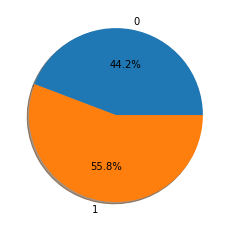

In [6]:
Data = [Num_zeros, Num_ones]
plt.pie(Data, labels = [0,1], center = (0,0), shadow = True, autopct = '%1.1f%%')

In [7]:
? nltk.download

In [27]:
nltk.download('stopwords',raise_on_error=False) # stop words include “a”, “an”, “the”, “of”, “in”

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [8]:
All_stopwords = stopwords.words("english")
print(type(All_stopwords))
print(len(All_stopwords))

<class 'list'>
179


In [9]:
All_stopwords.remove("not")

#### Removing all the non alpha numerical data

In [10]:
Alpha_numeric = []
for i in Df.sentence:
    sentence = re.sub(r"[^a-zA-Z0-9]", " ", i)
    Alpha_numeric.append(sentence)

#### Lowecasing all the characters

In [11]:
lower_cased_sentences = []
for i in Alpha_numeric:
    lower_cased_sentences.append(str(i).lower())

#### Removing all the stopwords

In [12]:
cleaned_data1 = []
for i in lower_cased_sentences:
    splited_list = i.split()
    cleaned = [j for j in splited_list if j not in All_stopwords]    
    cleaned_data1.append(' '.join(cleaned))

#### Stem the words

In [13]:
stemmed_data = []
ps = PorterStemmer()
for i in cleaned_data1:
    splited_list = i.split()
    stemming = [ps.stem(j) for j in splited_list]
    stemmed_data.append(' '.join(stemming))

In [14]:
pre_processed_data = stemmed_data

#### Keeping all these preprocessing steps in a function

In [15]:
def Data_Preprocessing(dataset):
    corpus = []
    for i in range(0,len(dataset)):
        sentence = re.sub(r"[^a-zA-Z0-9]", " ", dataset.sentence[i])
        sentence = sentence.lower()
        sentence = sentence.split()
        sentence = [word for word in sentence if word not in All_stopwords]
        sentence = [ps.stem(word) for word in sentence]
        sentence = ' '.join(sentence)
        corpus.append(sentence)
    return corpus

In [16]:
def String_Preprocessing(review):
    sentence = re.sub(r"[^a-zA-Z0-9]", " ", review)
    sentence = sentence.lower()
    sentence = sentence.split()
    sentence = [word for word in sentence if word not in All_stopwords]
    sentence = [ps.stem(word) for word in sentence]
    sentence = ' '.join(sentence)
    return sentence

#### Vectorize the words using Count Vectorizer

In [17]:
cv = CountVectorizer()

In [18]:
X = cv.fit_transform(pre_processed_data).toarray()
Y = Df.iloc[:,-1].values

In [19]:
# print("Vocabulary: " + str(cv.vocabulary_))

#### Train the model

In [20]:
classifier = GaussianNB()
classifier.fit(X,Y)

GaussianNB()

In [21]:
import joblib
joblib.dump(classifier, "classifier.pkl")

['classifier.pkl']

#### Test the model

In [22]:
test_Df = pd.read_csv(r"SST-2\dev.tsv", sep = "\t") 

In [23]:
test_corpus = Data_Preprocessing(test_Df)
test_X = cv.transform(test_corpus).toarray()
test_Y = test_Df.iloc[:,-1].values

In [24]:
preds = classifier.predict(test_X)

In [25]:
classifier.score(test_X, test_Y)

0.7201834862385321

In [26]:
from sklearn.metrics import plot_confusion_matrix, classification_report

[[302 126]
 [118 326]]


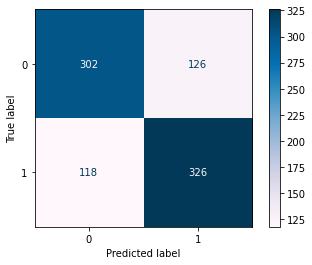

In [27]:
cf = plot_confusion_matrix(classifier, test_X, test_Y, cmap = "PuBu")
print(cf.confusion_matrix)
plt.show()

In [28]:
print(classification_report(test_Y, preds))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       428
           1       0.72      0.73      0.73       444

    accuracy                           0.72       872
   macro avg       0.72      0.72      0.72       872
weighted avg       0.72      0.72      0.72       872

